# ICS4U – Solving Problems using OOP
## ICS4U Learning Goals
In this ICS4U Grade 12 Computer Science lesson you will be learning how to

- Solve Problems Using Classes and Instances of Classes

<br>

# Robot Class Example
You are writing some code to control a simple robot as it goes on an adventure

Robot Details:

- The robot has a home base

- It can only move in a one dimensional straight line (LEFT or RIGHT) from its home base

- The robot can move at different speeds during its adventure

- It can start its adventure at any position from its home base, but it never has any inital speed upon creation

- The robot can have a maximum speed of 30 cm / s

We are going to create a Class to represent this robot

## Class Design

### Attribute: What data needs to be stored for each object

- A variable to store the position. Its the distance from home base in cm. (Positive if right of home base, negative if left of home base)

- A variable to store the speed(Can only be a positive number)

### Constructor: What should happen when the object first gets created?

- Accept the starting distance and direction from home as starting position

- Set the speed to zero

### Behaviours: What should each object be able to do?

- Move Right:

  - Accept how long in seconds to move the robot

  - New position = old position + speed*time

- Move Left:

  - Accept how long in seconds to move the robot

  - New position = old position – speed*time

- Change Speed:

  - Need a function and can’t just modify instance variable because there are restrictions

  - Accept the amount to change the speed by

  - Positive -> Faster

  - Negative -> Slower

  - new speed = old speed + amount

  - Check if speed exceeds the max -> set speed to 30

  - Check if speed goes negative -> set speed to 0

- Display Function:

  - Show position as right or left

  - Use `__str__`

In [ ]:
class Robot:

    def __init__(self,position, direction):

        if direction == "RIGHT":
            self.position = position
        elif direction == "LEFT":
            self.position = -1*position
        else:
            print("Invalid direction, POSITION = HOME BASE")
            self.position = 0

        self.speed = 0

    def moveRight(self, time):
        if self.speed == 0:
            print("Set Speed Before Moving")
        else:
            self.position = self.position + self.speed * time

    def moveLeft(self, time):
        if self.speed == 0:
            print("Set Speed Before Moving")
        else:
            self.position = self.position - self.speed * time

    def changeSpeed(self,amount):
        if self.speed + amount < 0:
            self.speed = 0
        elif self.speed + amount > 30:
            self.speed = 30
        else:
            self.speed = self.speed + amount

    def __str__(self):
        if self.position == 0:
            return "At Home Base"
        elif self.position > 0:
            return str(self.position) + "cm RIGHT of Home Base"
        else:
            return str(self.position) + "cm LEFT of Home Base"

<br>

## Using the Class
Now suppose you wanted to make the robot do the following

- Start 60 cm right of his home base

- Move right at 5 cm/s for 10s

- Slow down by 2 cm/s and keep moving right for 5s

- Turn around and move left speeding up by 6 cm/s for 12s

The main program would look like this.

In [ ]:
#Main Program

#Create robot 60 cm right of his home base
r2d2 = Robot(60,"RIGHT")

#Move right at 5 cm/s for 10s
r2d2.changeSpeed(5)
r2d2.moveRight(10)

#Slow down by 2 cm/s and keep moving right for 5s
r2d2.changeSpeed(-2)
r2d2.moveRight(5)

#Turn around and move left speeding up by 6 cm/s for 12s
r2d2.changeSpeed(6)
r2d2.moveLeft(12)

#Final position
print("Final Position is: ", r2d2)

<br>

<br>

# Vector Addition Example
In Physics there are physical quantities that have just a size associated with them like time, mass, and volume. However there are also quantities that have a direction associated with them. Things like position, velocity, acceleration, Force. Quantities that have both a size and a direction are called vectors. It should also be noted that with a vector the size is often called its magnitude

It is important in science to be able to know how to add numbers that have directions associated with them. For example here are some one dimensional vector math equations

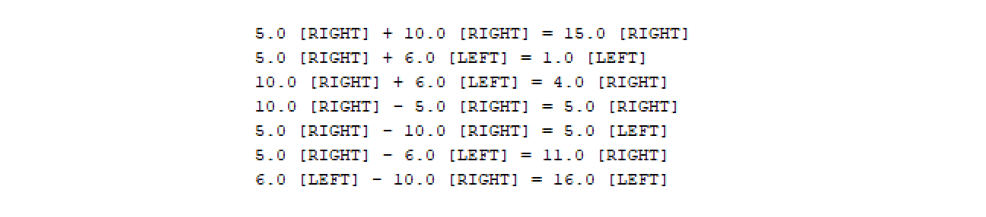

The easiest way to think about the calculations above are to think as all vectors that are pointing to the right as positive numbers and all vectors that are pointing to the left as negative numbers.

We are going to design a Vector object that can add and subtract vector quantities in 1 dimension.

## Class Design

### Attributes: What data needs to be stored for each object

- A variable to store the magnitude

- A variable to store the direction (“LEFT” or “RIGHT”)

- A helper varialble that will represent all numbers that point right as positive and all numbers that point left as negative

### Constructor: What should happen when the object first gets created?


- Accept the magnitude and direction as input parameters and check for valid inputs

### Behaviours: What should each object be able to do?


- Add:

  - Accept a Vector object as a parameter

  - Add the vector sizes -> If > 0 then RIGHT, else LEFT

  - Return a new Vector object

  - Call like `v1.add(v2)`

- Subtract:

  - Accept a Vector object as a parameter

  - Subtract the vector sizes -> If > 0 then RIGHT, else LEFT

  - Return a new Vector object

  - Call like `v1.subtract(v2)`

- Display Function:

  - Show magnitude and then position as RIGHT or LEFT in [ ] brackets

  - Use `__str__`

In [ ]:
class Vector:

    def __init__(self, m, d):

        error = False
        d = d.upper()

        if m > 0:
            self.magnitude = m

            if d == "RIGHT":
                self.direction = "RIGHT"
                self.vectorSize = m
            elif d == "LEFT":
                self.direction = "LEFT"
                self.vectorSize = m*-1
            else:
                error = True

        else:
            error = True

        if error:
            print("ERROR IN INPUT: SO I CREATED A VECTOR 1 UNIT [RIGHT]")
            self.direction = "RIGHT"
            self.magnitude = 1
            self.vectorSize = 1

    def add(self, v):
        sum = self.vectorSize + v.vectorSize
        if sum > 0:
            return Vector(sum, "RIGHT")
        else:
            return Vector(sum * -1, "LEFT")

    def subtract(self, v):
        diff = self.vectorSize - v.vectorSize
        if diff > 0:
            return Vector(diff, "RIGHT")
        else:
            return Vector(diff * -1, "LEFT")

    def __str__(self):
        return str(self.magnitude) + " " + "[" + self.direction + "]"

<br>

## Using the Class
Simple example of adding and subtracting some vectors in 1 Dimension. 

- Pay particular attention to how you are calling the addition/subtraction function with one of the vectors and passing the second vector to it.  

- Notice how that is accomplished in the function itself with using the self variable and the passed parameter name along with how it returns a new Vector instance

- When a new instance is returned, it can be stored using a variable name in the main program…. So below “a”, “b”, “c” are Vector Instances 


In [ ]:
#Main Program

#Create some vectors
v1 = Vector(5,"RIGHT")
v2 = Vector(10,"RIGHT")
v3 = Vector(6,"LEFT")

#Add v1 and v2
a = v1.add(v2)
print(v1, "+", v2, "=",a)

#Subtract v1 from v2
b = v2.subtract(v1)
print(v2, "-", v1, "=",b)

#Add v1 and v3
c = v1.add(v3)
print(v1, "+", v3, "=",c)

<br>

<br>

# Hockey Team Example
In this example we are going to look at a hockey team with a bunch of players on it. We are going to create a Player Object and then make a list of Player objects to represent the team.

The data for our team is stored in a file. The file lists the jersey number, last name, first name, games played, goals, assists. Each player is on one line and all data is separated by a space

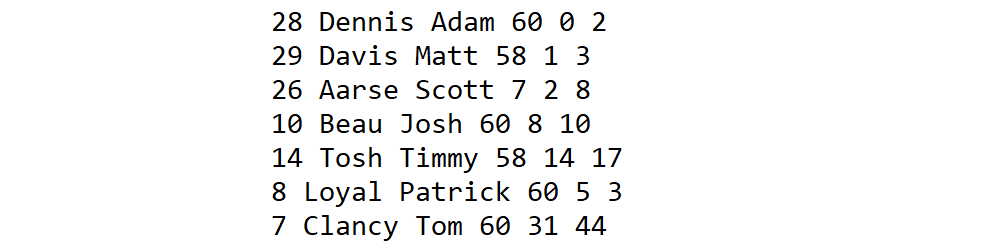

The Player Object will basically only store the main information about each player, it won’t have any behaviours associated with it. There should be a `__str__` function as well to display each player nicely.

This type of object is often called a record in programming as it doesn’t really have an behaviours.  It is just a structured way to store the data. 

In [ ]:
class Player:

	def __init__(self, jersey, lastName, firstName, games, goals, assists):
		self.jersey = jersey
		self.lastName = lastName
		self.firstName = firstName
		self.goals = goals
		self.assists = assists
		self.points = goals + assists
		self.gamesPlayed = games

	def __str__(self):
		return str(self.jersey) + "\t" + self.lastName + "\t" + self.firstName + "\t" + str(self.gamesPlayed) + "\t" + str(self.goals) +"\t"+ str(self.assists) + "\t" + str(self.points)

When dealing with data in files, regardless of what problem you are trying to solve, you would likely want to read that data in and store it in a List.  In this case you will be creating a list of Player Instance Objects.  

In [ ]:
#Open Data File
path = "team1.txt"
file = open(path,"r")

#Read Data and Create a team list of players from the file
team = []
while True:
	line = file.readline()
	if line == "":
		break
	else:
		tokens = line.split(" ")

		#Make a player object from the data
		p = Player(int(tokens[0]), tokens[1], tokens[2], int(tokens[3]), int(tokens[4]), int(tokens[5].rstrip("\n")))

		#Make a team list
		team.append(p)

file.close()

Now we are going to start adding some functionality into our main program. Let’s start by writing a function to print out the entire data for the team. Your programs are starting to get a little complicated with Classes, Functions, Main Programs, so I usually organize myself as follows: Imports at the top, followed by Class Definitions, Followed by functions needed for my Main Program, followed by code for my Main Program

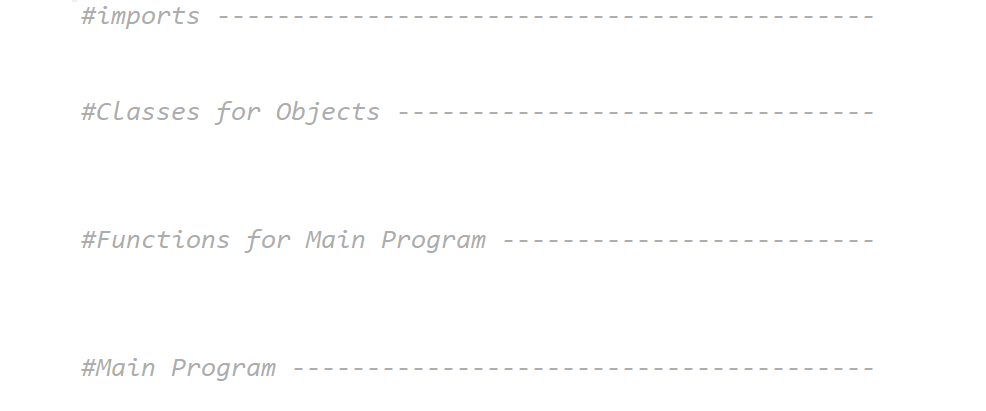

Just for an example, let’s add 3 pieces of functionality to this program.

- Printing the full team list

- Finding the total goals scored by the entire team

- Finding the player with the most points

It would likely be best to write some functions to accomplish these tasks.

In [ ]:
def printFullTeamData(team):
	for i in range(0,len(team)):
		print(team[i])

def totalGoals(team):
   total = 0
   for i in range(0,len(team)):
	   total = total + team[i].goals
   return total

def playerWithMaxPoints(team):
	maxPoints = 0
	for i in range(0,len(team)):
		if team[i].points > maxPoints:
			maxPoints = team[i].points
			player = team[i]
	return player

Take note how the individual instances of the Player objects in the team list are accessed from within the function. 

- The object is referenced using the item from the list (team[i])

- Since team[i] is an object you can use the dot notation to access its attribute variable

Using the functions in your main program

In [ ]:
#Print the team
print("The Team has the following Players:")
printFullTeamData(team)

#Find Total # of Goals
totalTeamGoals = totalGoals(team)
print("The team scored a total of: ", totalTeamGoals, "goals")

#Find Player with Max Points
playerMost = playerWithMaxPoints(team)
print(playerMost.firstName, playerMost.lastName, "scored the most points with", playerMost.points)

<br>

<br>

# Programs with Multiple Classes
The program above could have also been written with a more Object Oriented Approach. Not only is a Player a good object to have in the program, but perhaps the Team itself could be represented by an object. We can use both those objects to accomplish the same task

In [ ]:
#Classes---------------------------------------------------

#Player Object
class Player:

	def __init__(self, jersey, lastName, firstName, games, goals, assists):
		self.jersey = jersey
		self.lastName = lastName
		self.firstName = firstName
		self.goals = goals
		self.assists = assists
		self.points = goals + assists
		self.gamesPlayed = games

	def __str__(self):
		return str(self.jersey) + "\t" + self.lastName + "\t" + self.firstName + "\t" + str(self.gamesPlayed) + "\t" + str(self.goals) +"\t"+ str(self.assists) + "\t" + str(self.points)

#Team Object
class Team:

	#The team holds a list named roster of player objects
	def __init__(self):
		self.roster = []

	#Players are added separately after creating a team
	def addPlayer(self, player):
		self.roster.append(player)

	def totalGoals(self):
		totalGoals = 0
		for i in range(0,len(self.roster)):
			totalGoals = totalGoals + self.roster[i].goals
		return totalGoals

	def playerMaxPoints(self):
		maxPoints = 0
		for i in range(0,len(self.roster)):
			if self.roster[i].points > maxPoints:
				maxPoints = self.roster[i].points
				player = self.roster[i]
		return player

	def __str__(self):

		out = ""
		for i in range(0,len(self.roster)):
			out = out + str(self.roster[i]) +"\n"
		return out

The main program functions have basically been moved inside the Team Class for this example

Here is how the main program would be adjusted

In [ ]:
#Open Data File
path = "team1.txt"
file = open(path,"r")

#Create a Team
t = Team()

#Read Data and Add Players to the Team
while True:
    line = file.readline()
    if line == "":
        break
    else:
        tokens = line.split(" ")

        #Make a player object from the data
        p = Player(int(tokens[0]), tokens[1], tokens[2], int(tokens[3]), int(tokens[4]), int(tokens[5].rstrip("\n")))

        #Make a team list
        t.addPlayer(p)

file.close()


#Print the team
print("The Team has the following Players:")
print(t)

#Find Total # of Goals
print("The team scored a total of: ", t.totalGoals(), "goals")

#Find Player with Max Points
playerMost = t.playerMaxPoints()
print(playerMost.firstName, playerMost.lastName, "scored the most points with", playerMost.points)